# A simple SVM implementation in scikit-learn

Let us train an SVM model to classify the different flowers in our Iris dataset.

We are going to reuse some of our previous code to load the dataset and to plot decision regions.

In [1]:
%config InlineBackend.figure_format='retina'
import numpy as np
from sklearn import datasets
from matplotlib import cm
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'v', 'o')
    colors = ['red', 'blue', 'green']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

The three decision regions of the SVM, visualized after training the classifier on the Iris dataset by executing the preceding code example, are shown in the following plot.

[0 1 2]


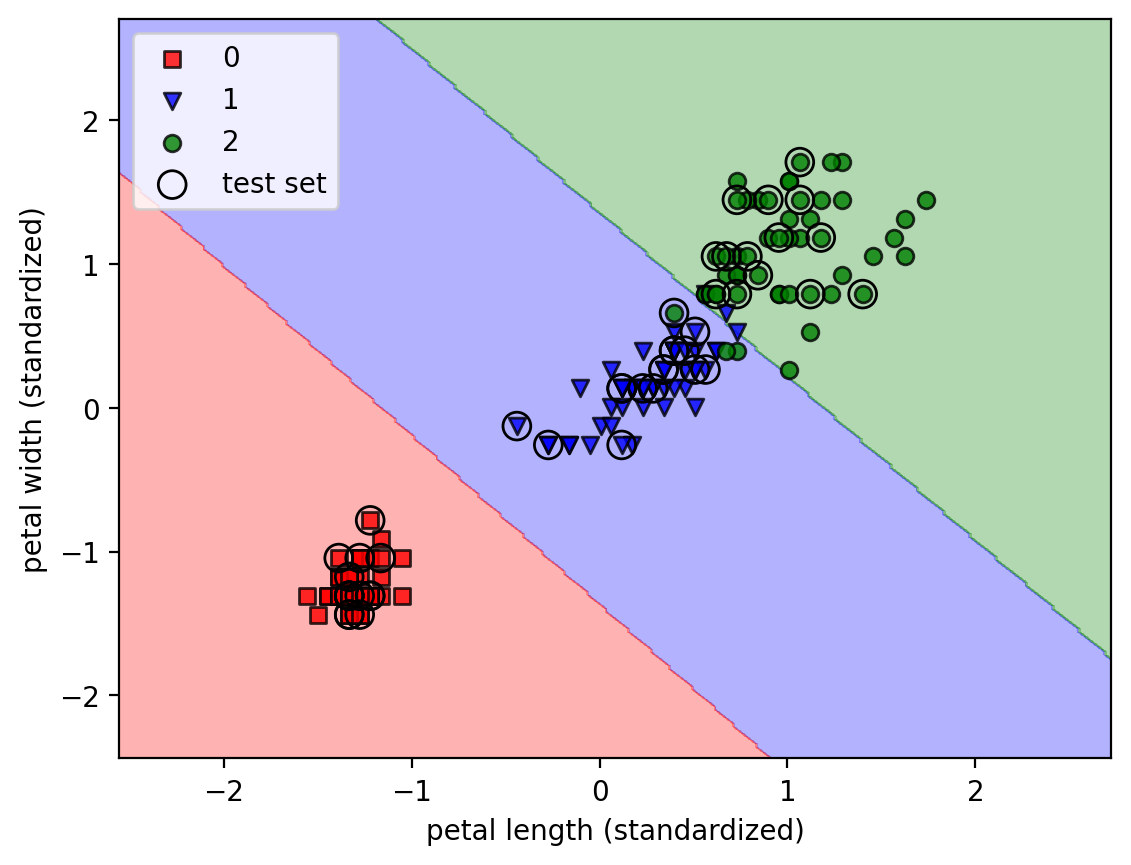

In [2]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

# Alternative implementations in scikit-learn

The scikit-learn library's `Perceptron` and  `LogisticRegression` classes, which we used previosuly make use of the `LIBLINEAR` library, which is a highly optimized C/C++ library developed at the National Taiwan University (http://www.csie.ntu.edu.tw/~cjlin/liblinear/). Similarly, the `SVC` class that we used to train an SVM makes use of `LIBSVM`, which is an  equivalent C/C++ library specialized for SVMs.

The advantage of using `LIBLINEAR` and `LIBSVM` over native Python implementations is that they allow the quick training of large amounts of linear classifiers.
However, sometimes our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations via the `SGDClassifier` class, which also supports online learning via the `partial_fit` method. The concept behind the `SGDClassifier` class is similar to the stochastic gradient algorithm that we implemented before.

We initialize the stochastic gradient descent version of the perceptron, logistic regression, and SVM with default parameters as follows.

In [3]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

A reason why SVMs enjoy high popularity among machine learning practitioners is that it can be easily kernelized to solve nonlinear classification
problems.

Let's create a sample dataset to see what such a nonlinear classification problem may look like.

Using the following code, we will create a simple dataset that has the form of an XOR gate using the logical_or function from NumPy, where 100 samples will be assigned the class label 1 , and 100 samples will be assigned the class label -1.

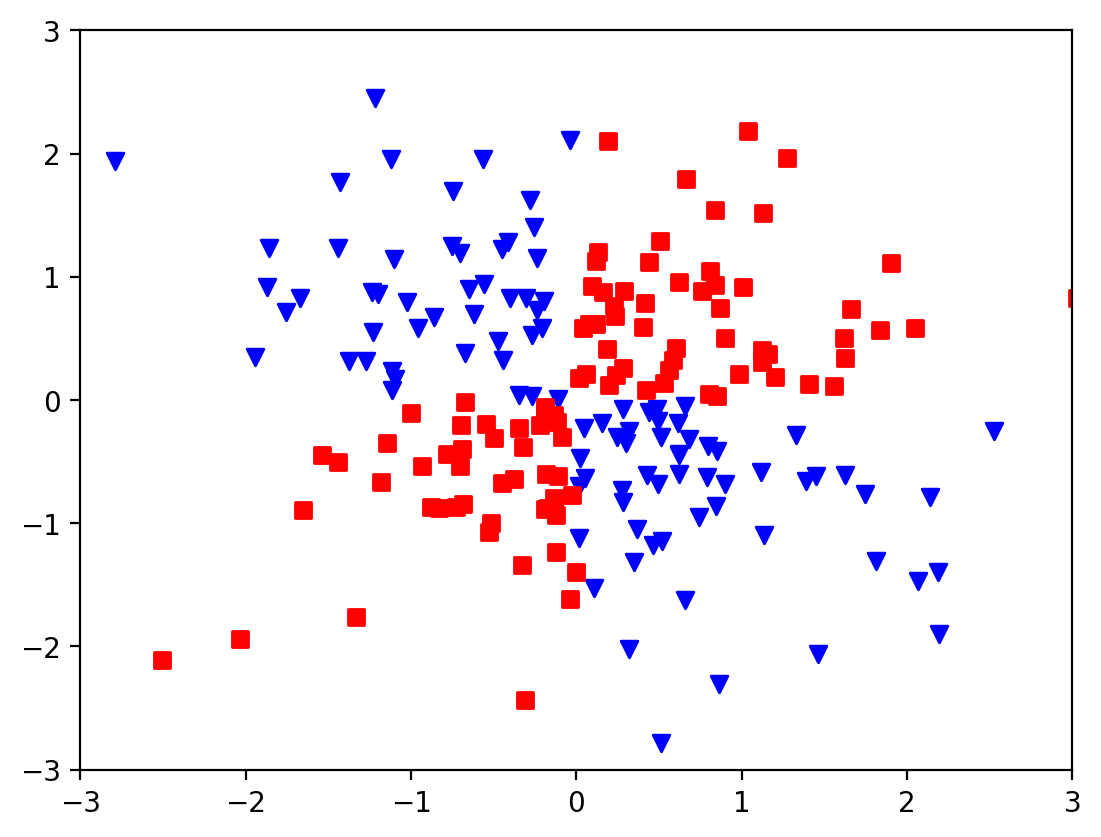

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='v')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

Let us see if we can train a kernel SVM that is able to draw a nonlinear decision boundary that separates the XOR data well. Here, we simply use the `SVC` class from scikit-learn that we imported earlier and replace the `kernel='linear'` parameter with  `kernel='rbf'`.

[-1  1]


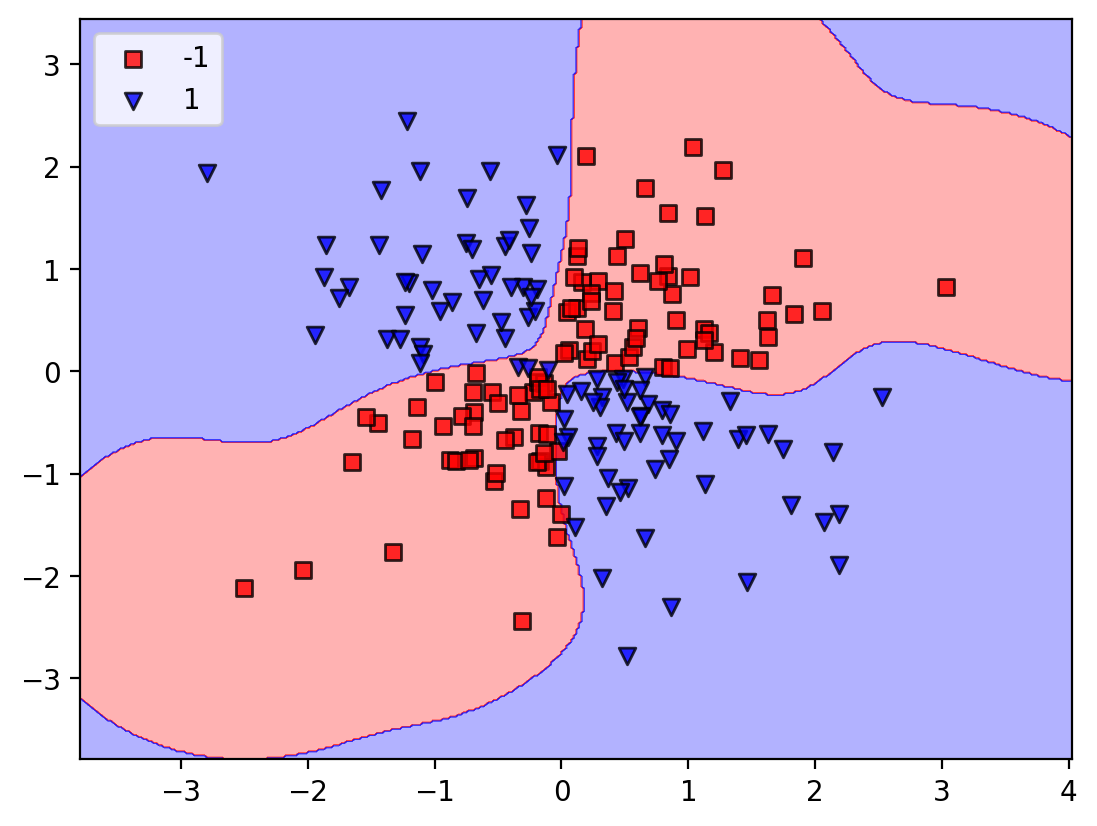

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=20.0, gamma = 1, random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm, test_idx=None)
plt.legend(loc='upper left')
plt.show()

The gamma parameter, which we set to 0.1, can be understood as a cut-off parameter for the Gaussian sphere.
If we increase the value for gamma, we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary.

To get a better intuition for gamma, let us apply an RBF kernel SVM to our Iris flower dataset.

[0 1 2]


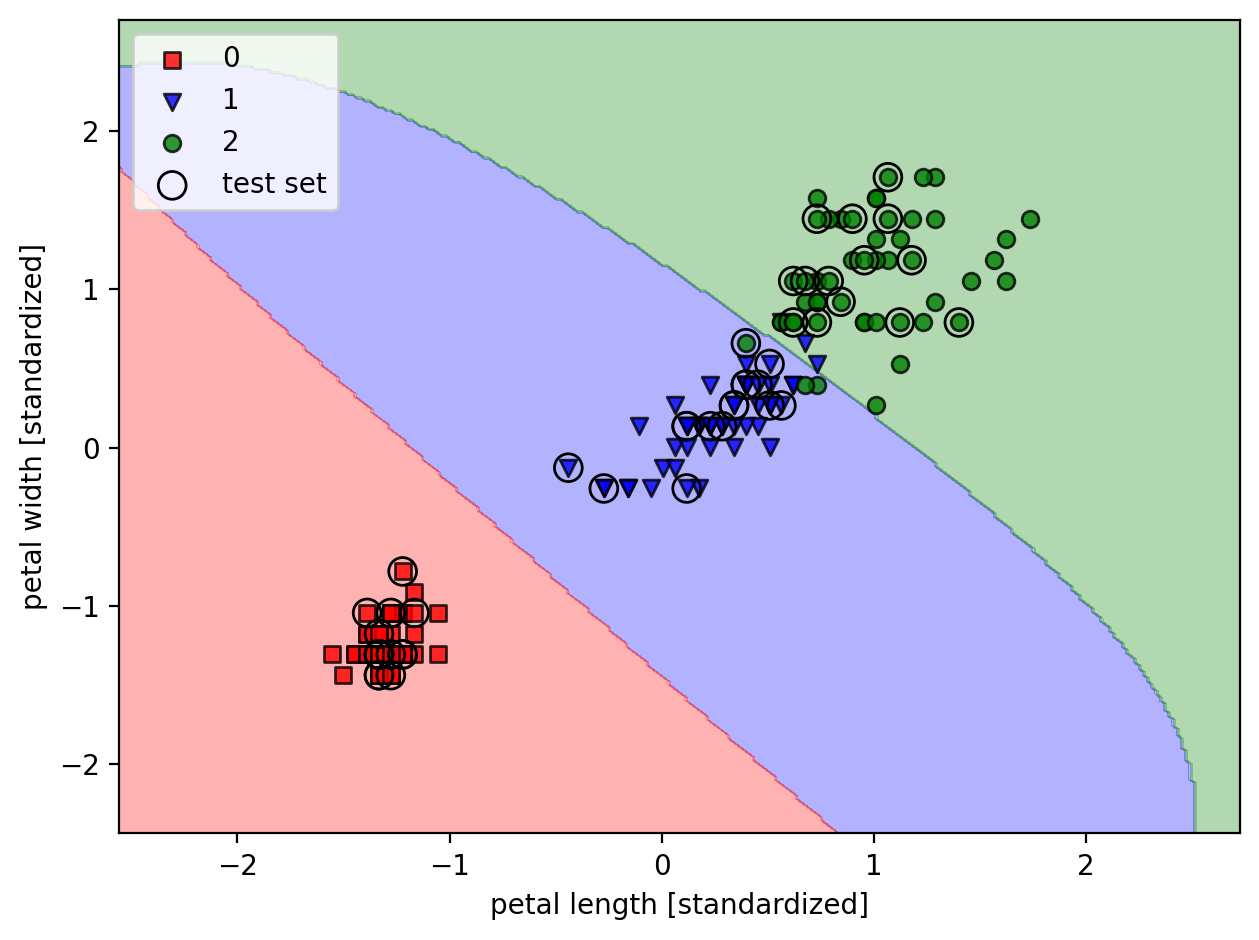

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Now, let us increase the value of gamma and observe the effect on the decision boundary.

[0 1 2]


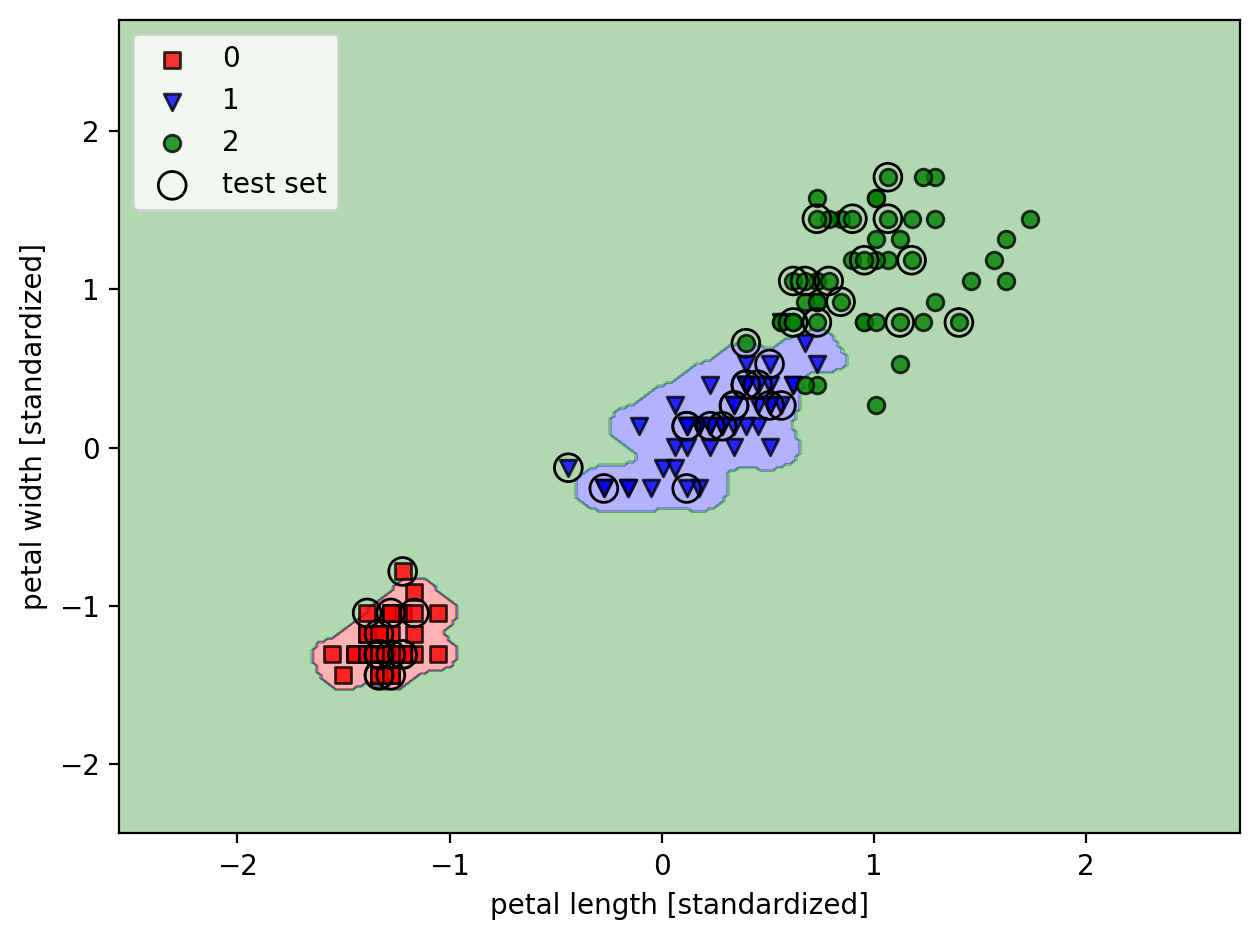

In [7]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the gamma parameter also plays an important role in controlling overfitting.